In [2]:
import numpy as np
import matplotlib.pyplot as plt
import requests

## Questão 5

Seja X_i uma v.a. uniforme [0,1]. Vamos calcular uma aproximação para e usando o valor esperado do numero de vezes necessário para que o somatório de X_i > 1, i = 1,...,n.

In [3]:
def compute_e(N):
    total = 0
    for i in range(N):
        sum_ = 0
        trials = 0
        while sum_ < 1:
            sum_ += np.random.uniform(0,1,1)
            trials += 1
        total += trials
    return total/N
N = 1000
compute_e(N)

2.712

In [4]:
y = []
for i in range(1,1001):
    y.append(compute_e(i))

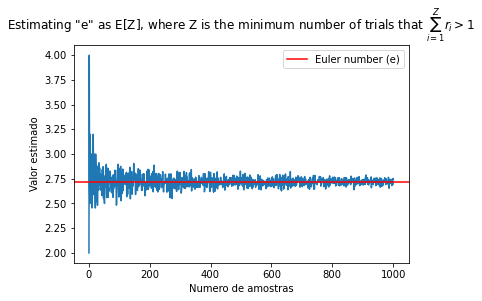

In [5]:
plt.plot(range(1,1001),y)
plt.xlabel("Numero de amostras")
plt.ylabel("Valor estimado")
plt.axhline(y=np.e,color = 'r',label="Euler number (e)")
plt.legend()
plt.title("Estimating \"e\" as E[Z], where Z is the minimum number of trials that $\sum_{i=1}^Z r_i > 1$")
plt.show()

## Questão 7 

Estimating the number of pages on the web with k <= 4 letters

In [5]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [6]:
def make_estimative(k,n):
    sum_ = np.sum([26**i for i in range(1,k+1)])
    #CRIA UM INTERVALO DE 0-1 PARA FAZER AMOSTRAGENS PROPORCIONAIS A QUANTIDADE DE LETRAS EM CADA INTERVALO
    intervals = [26**i/sum_ for i in range(1,k+1)]
    for i in range(k-1):
        intervals[i+1] += intervals[i]
    samples = np.random.uniform(0,1,n)
    total = 0#variavel que armazena quantos sites o request atendeu
    for sample in samples:
        m = 1 #É uma variável que determina quantas letras serão amostradas. 
        #Se a v.a. cair no primeiro intervalo, então apenas uma será amostrada. Se no segundo intervalo, duas, etc.
        for l,i in enumerate(intervals):
            if sample > i:
                m += 1
        letters_index = np.random.randint(0,25,m)
        site = ""
        for v in letters_index:
            site+=alphabet[v]
        site = "http://www."+site+".ufrj.br"
        try:
            response = requests.get(site)
            if response.status_code == 200:
                total+=1
        except requests.ConnectionError:
            pass
    return sum_*total/n

In [9]:
y = []
for i in np.linspace(1,10000,10):
    y.append(make_estimative(4,int(i)))

In [ ]:
plt.plot(range(1,1000),y)
plt.xlabel("Numero de amostras")
plt.ylabel("Valor estimado")
plt.show()

## Questão 8  

Sampling Binomial distribution from uniform 

In [9]:
n = 1000
p = 0.2
binom(n,n*p)*(0.2**(n*p))*(0.8**(n - n*p))

0.03152536117328621

In [5]:
from scipy.special import binom
def sample_binom(n,p):
    max_pmf = binom(n,n*p)*(0.2**(n*p))*(0.8**(n - n*p))
    while True:
        sample = np.random.randint(0,n)
        u = np.random.uniform(0,max_pmf)
        if u < binom(n,sample)*(0.2**(sample))*(0.8**(n - sample)):
            return sample

(array([  1.,   1.,   2.,   2.,   0.,   1.,   4.,   2.,   3.,   7.,   5.,
          0.,   4.,   7.,  20.,  13.,  12.,  18.,  25.,  28.,  38.,  47.,
          0.,  58.,  66.,  80.,  75.,  95.,  93., 105., 134., 147., 157.,
          0., 165., 179., 182., 242., 237., 244., 262., 238., 288., 311.,
          0., 312., 301., 338., 300., 323., 291., 306., 307., 283., 271.,
          0., 288., 301., 280., 227., 233., 216., 188., 202., 163., 169.,
          0., 149., 105., 115.,  84.,  95.,  78.,  83.,  63.,  60.,  43.,
          0.,  40.,  31.,  28.,  25.,  23.,  14.,  11.,  12.,  11.,   8.,
          0.,   4.,   3.,   4.,   5.,   3.,   2.,   0.,   1.,   2.,   0.,
          1.]),
 array([155.  , 155.91, 156.82, 157.73, 158.64, 159.55, 160.46, 161.37,
        162.28, 163.19, 164.1 , 165.01, 165.92, 166.83, 167.74, 168.65,
        169.56, 170.47, 171.38, 172.29, 173.2 , 174.11, 175.02, 175.93,
        176.84, 177.75, 178.66, 179.57, 180.48, 181.39, 182.3 , 183.21,
        184.12, 185.03, 185.94

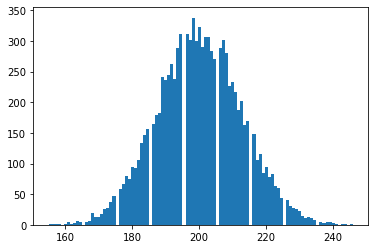

In [6]:
y = []
for i in range(10000):
    y.append(sample_binom(1000,0.2))
plt.hist(y,100)

In [ ]:
def sample_binom2(n,p):
   ##TODO

## Questão 9 

Approximating the integral $\int_0^1e^{-x^2}dx$

In [19]:
n = 1000000
exact = 0.746824
def method1(n):
    samples_x = np.random.uniform(0,1,n)
    samples_y = np.random.uniform(0,1,n)
    total = 0
    for x,y in zip(samples_x,samples_y):
        if y < np.exp(-x**2):
            total += 1
    return total/n

def generate_H(x):
    return np.e*np.exp(-x)/(np.e - 1)

def generate_H_inv(u):
    return -np.log(1 - u*(np.e-1)/np.e)

def method2(n):
    u = np.random.uniform(0,1,n)
    x = generate_H_inv(u)
    t = np.sum(np.exp(-x**2)/generate_H(x))
    return t/n

(0.0, 0.05)

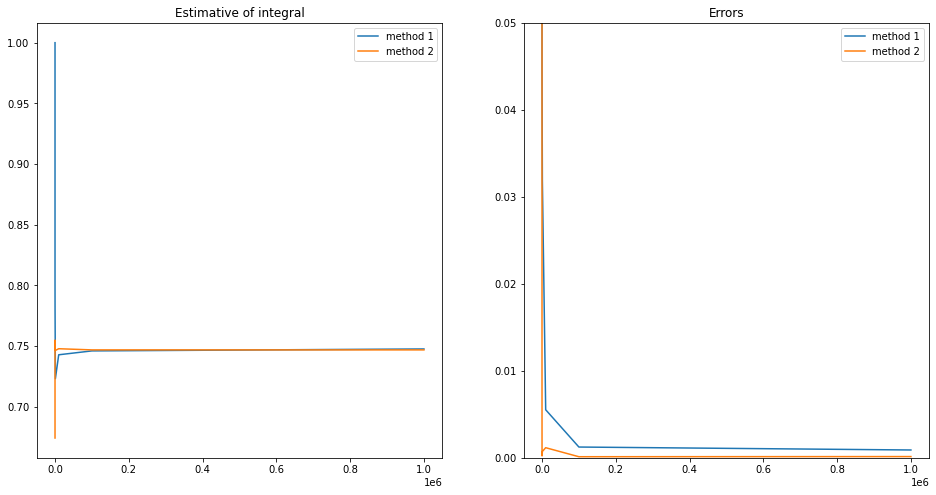

In [58]:
y_1 = []
y_2 = []
fig,axs = plt.subplots(1,2,figsize=(16,8))
ns = [10**i for i in range(7)]
for n in ns:
    y_1.append(method1(n))
    y_2.append(method2(n))
axs[0].plot(ns,y_1,label="method 1")
axs[0].plot(ns,y_2,label="method 2")
axs[0].legend()
axs[0].set_title("Estimative of integral")
axs[1].plot(ns,np.abs([(y_1[i] - exact)/exact for i in range(len(y_1))]),label="method 1")
axs[1].plot(ns,np.abs([(y_2[i] - exact)/exact for i in range(len(y_1))]),label="method 2")
axs[1].legend()
axs[1].set_title("Errors")
axs[1].set_ylim(0,0.05)